# 3. CIFAR10 딥러닝 모델

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [28]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [29]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

In [30]:
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [31]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/512647112.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


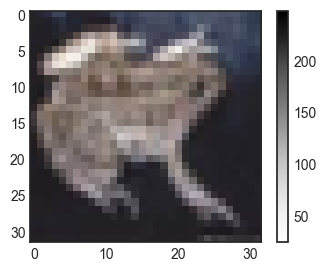

In [32]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure(figsize=(4,3))
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [33]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [34]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [35]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(40000, 3072) (40000, 1)
(10000, 3072) (10000, 1)
(10000, 3072) (10000, 1)


In [36]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [37]:
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [40]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

import tensorflow as tf

def create_model(input_shape, num_classes=10):
    
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Dense(2048, activation='relu')(input_layer)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=input_layer, outputs=outputs)
    return model

INPUT_SHAPE = x_train.shape[1]
model = create_model(INPUT_SHAPE, num_classes=10)

In [41]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_8 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_2 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_3 (Bat  (None, 1024)              4096      
 chNormalization)                                          

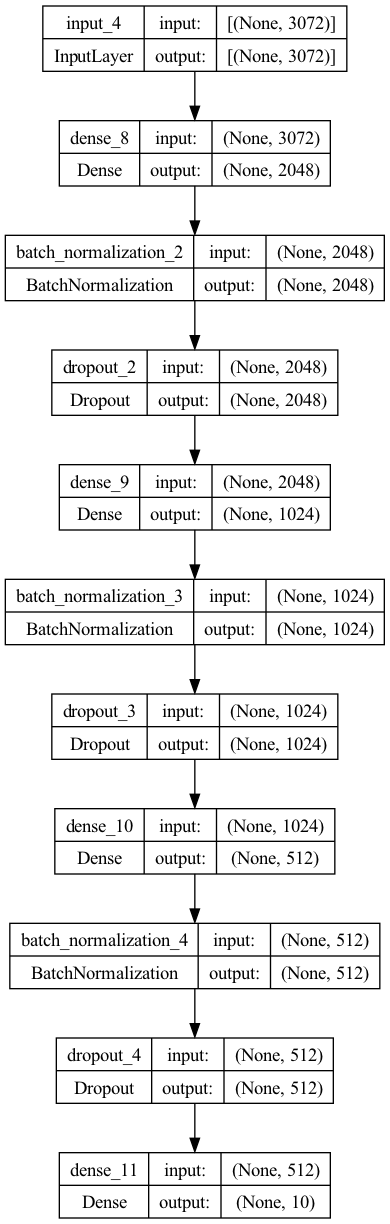

In [42]:
utils.plot_model(model, show_shapes=True)

In [43]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

In [44]:
history = model.fit(x_train, y_train, epochs=30,
                    batch_size=512,
                    callbacks=[check_point_cb, early_stopping_cb],
                    validation_data=(x_val, y_val))

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 2.0124 - accuracy: 0.3242

/Users/salgu/miniconda3/envs/py38/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 11s 135ms/step - loss: 2.0124 - accuracy: 0.3242 - val_loss: 2.2548 - val_accuracy: 0.2808
Epoch 2/30
79/79 [==============================] - 10s 131ms/step - loss: 1.7233 - accuracy: 0.4003 - val_loss: 1.9359 - val_accuracy: 0.3561
Epoch 3/30
79/79 [==============================] - 14s 172ms/step - loss: 1.6148 - accuracy: 0.4312 - val_loss: 1.9125 - val_accuracy: 0.3329
Epoch 4/30
79/79 [==============================] - 11s 137ms/step - loss: 1.5396 - accuracy: 0.4538 - val_loss: 1.9208 - val_accuracy: 0.3376
Epoch 5/30
79/79 [==============================] - 12s 151ms/step - loss: 1.4795 - accuracy: 0.4781 - val_loss: 2.0247 - val_accuracy: 0.3070
Epoch 6/30
79/79 [==============================] - 12s 153ms/step - loss: 1.4334 - accuracy: 0.4904 - val_loss: 2.1994 - val_accuracy: 0.2725


/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/4275291862.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


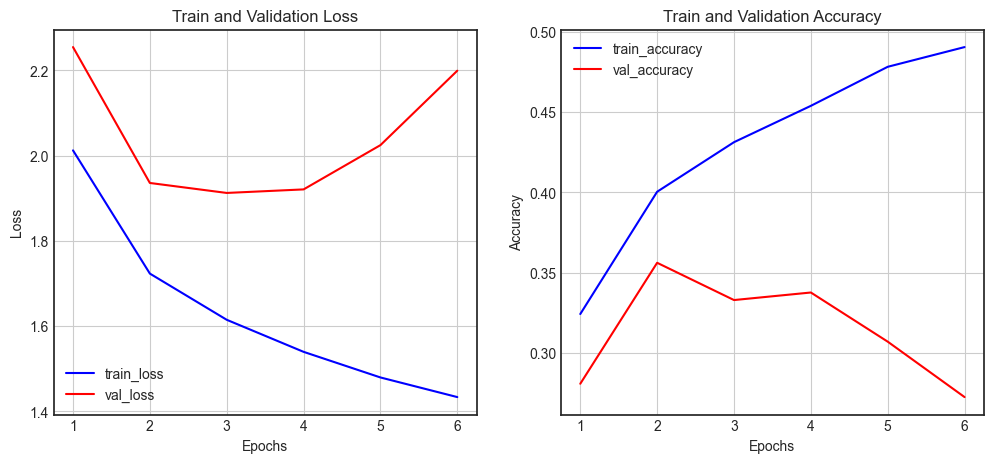

In [45]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [46]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.9191 - accuracy: 0.3256


[1.9191248416900635, 0.3255999982357025]

In [47]:
del model